In [7]:
import numpy as np
import sys, os, git, lammps_logfile
from matplotlib import pyplot as plt

In [8]:
current_path = os.getcwd()
git_repo = git.Repo(current_path, search_parent_directories=True)
git_path = git_repo.git.rev_parse("--show-toplevel")
path_in_folder = current_path[len(git_path)+1:]
level = path_in_folder.split("/")[-2]
tutorial_name = path_in_folder.split("/")[-1]
print("level:" , level, "& tutorial name:", tutorial_name)
sys.path.append(git_path + "/docs/sphinx/source/tutorials/figures/pyplot-perso/")
from functions import complete_panel, save_figure, set_boundaries, \
                      add_subplotlabels, set_boundaries, prepare_figure
from color_series1 import colors
path_figures = current_path[len(git_path):] + '/'
data_path = git_path + "/docs/lammpstutorials-inputs/" + level + "/" + tutorial_name + "/my-first-input/"
print("data path: ", data_path)

level: level1 & tutorial name: lennard-jones-fluid
data path:  /home/simon/Git/LAMMPS/tutorials/docs/lammpstutorials-inputs/level1/lennard-jones-fluid/my-first-input/


In [9]:
log = lammps_logfile.File(data_path + "log.lammps")
timestep = 0.005
Time_EM = log.get("Step", run_num = 0)*timestep
PotEng_EM = log.get("PotEng", run_num = 0)
KinEng_EM = log.get("KinEng", run_num = 0)
Time_MD = log.get("Step", run_num = 1)*timestep
PotEng_MD = log.get("PotEng", run_num = 1)
KinEng_MD = log.get("KinEng", run_num = 1)

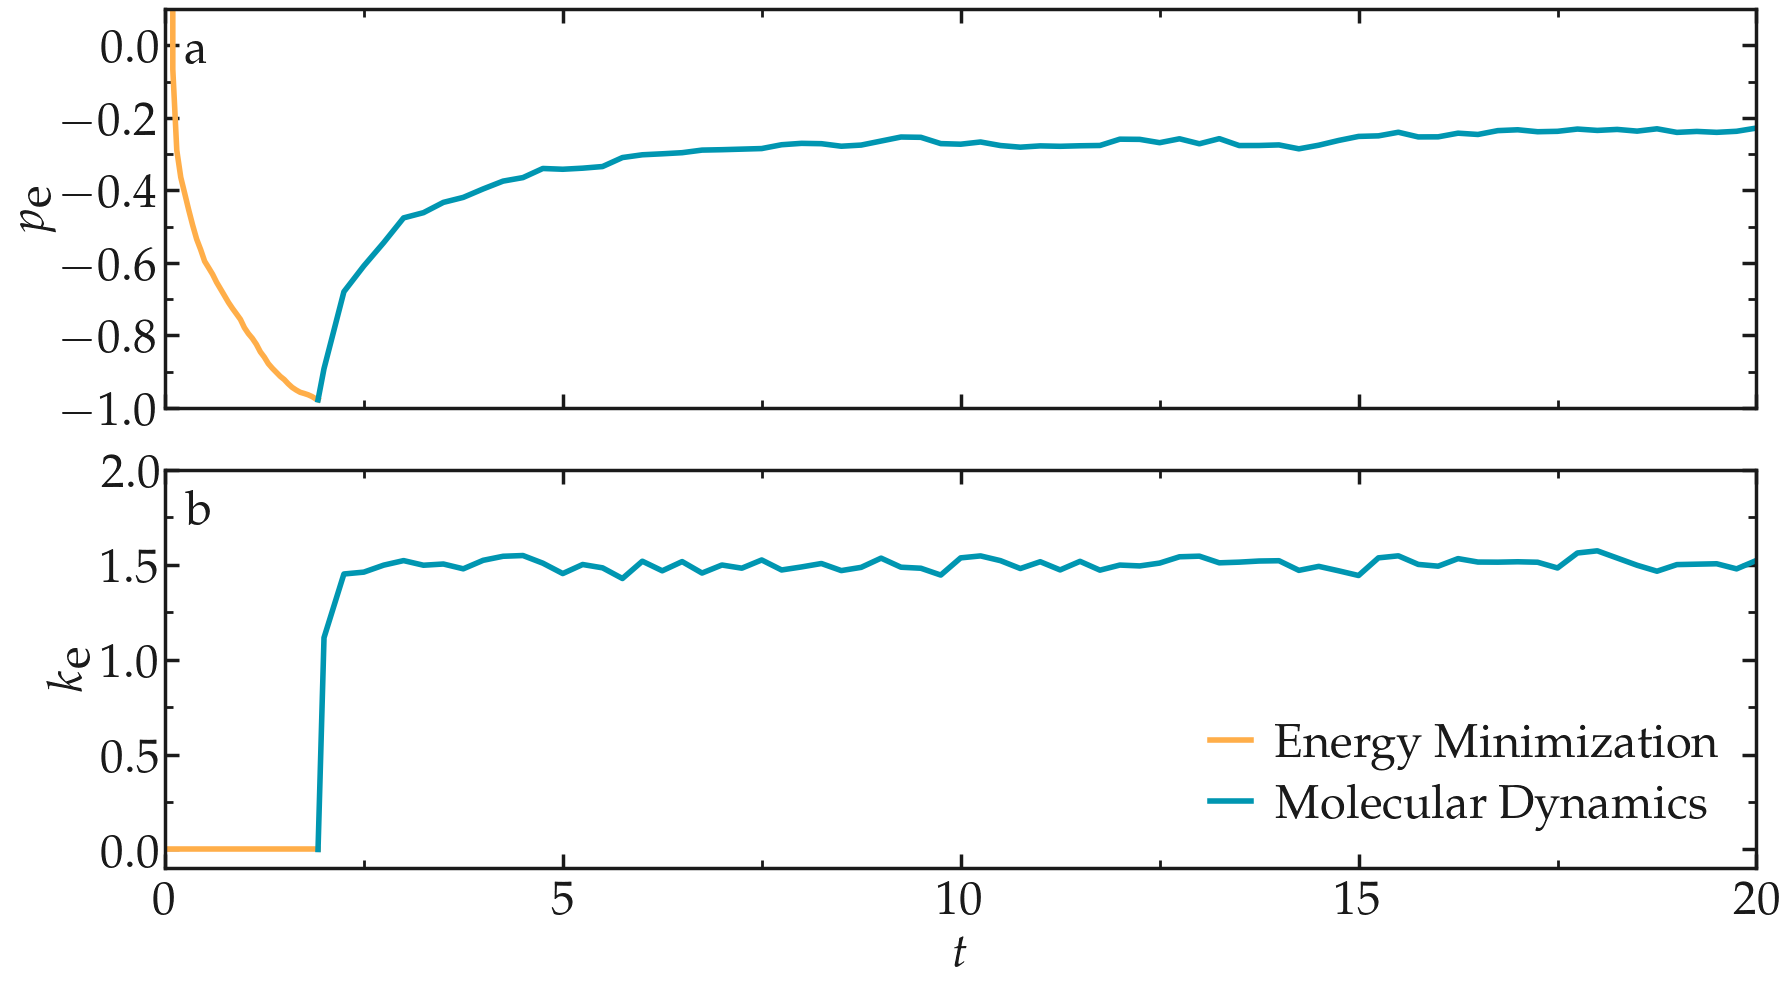

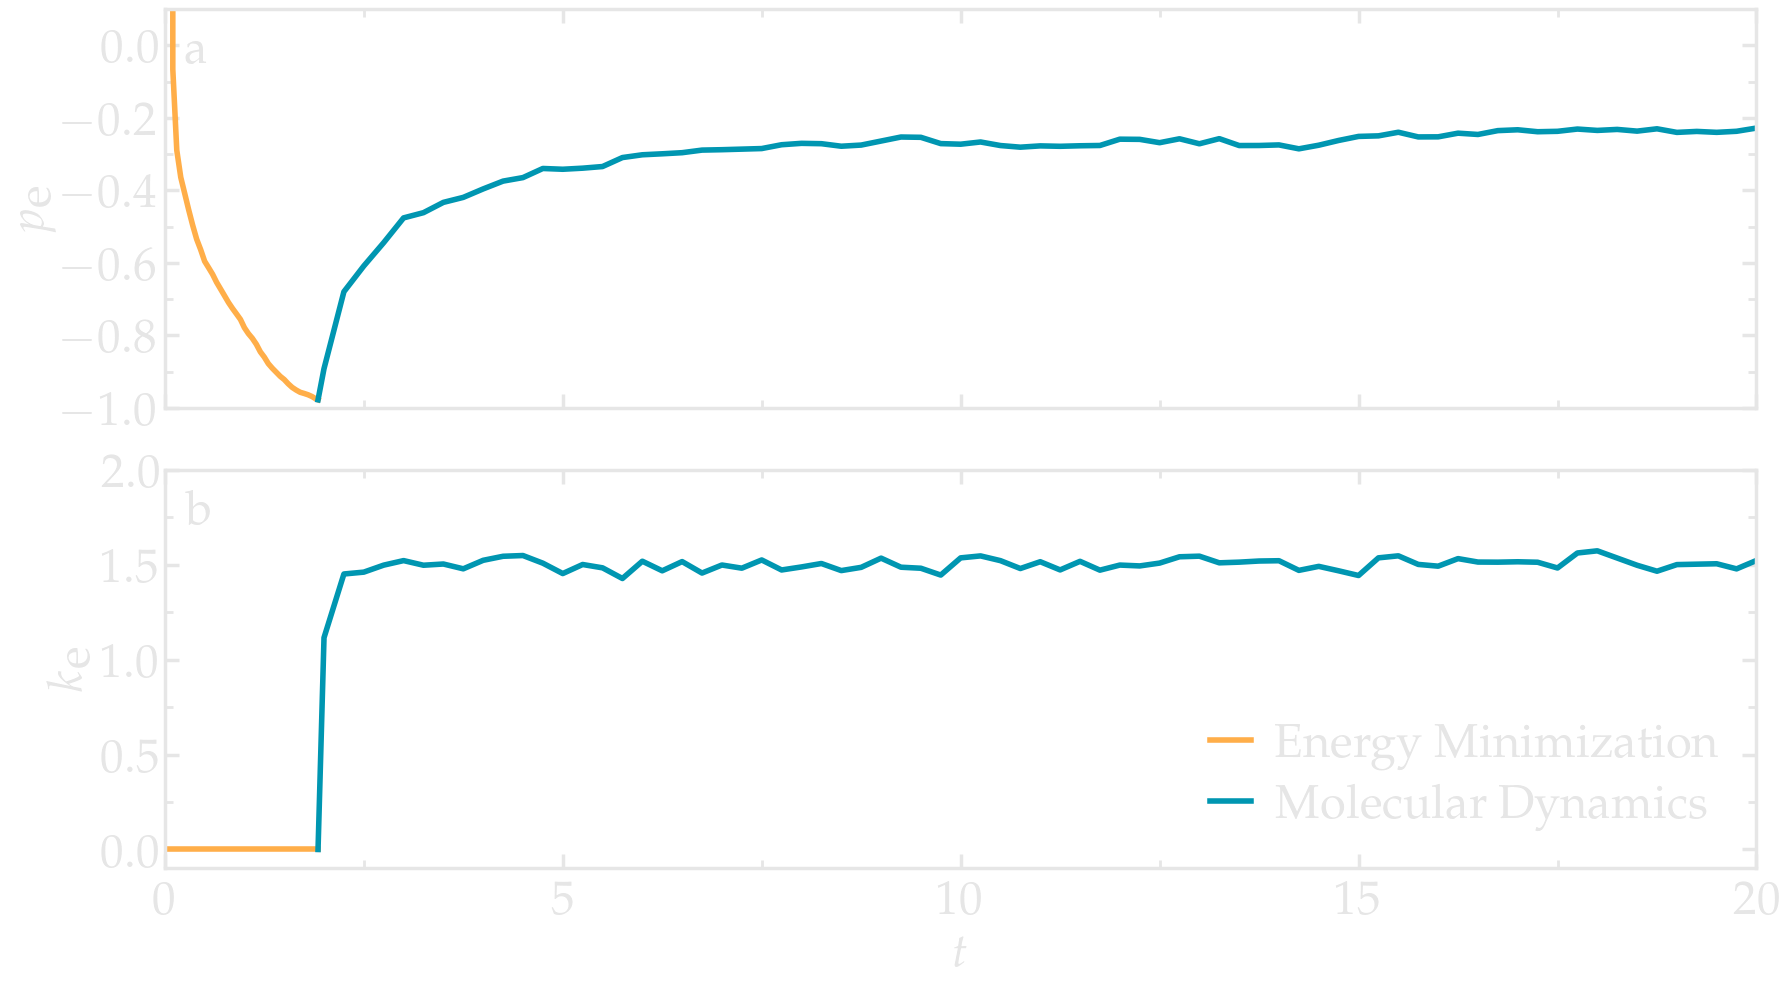

In [10]:
filename = "energy"
for mode, mygray in zip(['light', 'dark'], [colors["mylightgray"], colors["mydarkgray"]]):    
    fig = prepare_figure(mode, transparency = True, desired_figsize=(18,10))
    ax, n, l_tot, c_tot = [], 0, 2, 1
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Time_EM, PotEng_EM, '-', color=colors["myorange"],
                markersize = 12, linewidth=4)
    ax[-1].plot(Time_MD, PotEng_MD, '-', color=colors["myblue"],
                markersize = 12, linewidth=4)
    complete_panel(ax[-1], None, r'$p_\textrm{e}$', legend=False, axis_color=mygray)
    set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20),
                   y_ticks=np.arange(-1, 0.2, 0.2), y_boundaries=(-1, 0.1))
    n += 1
    ax.append(plt.subplot(l_tot, c_tot, n))
    ax[-1].plot(Time_EM, KinEng_EM, '-', color=colors["myorange"],
                markersize = 12, linewidth=4, label=r"Energy Minimization")
    ax[-1].plot(Time_MD, KinEng_MD, '-', color=colors["myblue"],
                markersize = 12, linewidth=4, label=r"Molecular Dynamics")
    complete_panel(ax[-1], r'$t$', r'$k_\textrm{e}$', legend=True, axis_color=mygray, xpad=8)
    set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20),
                   y_ticks=np.arange(-0, 2.5, 0.5), y_boundaries=(-0.1, 2))
    add_subplotlabels(fig, ax, [r"$\mathrm{a}$", r"$\mathrm{b}$"], color=mygray)
    save_figure(plt, fig, mode, git_path, path_figures, filename)

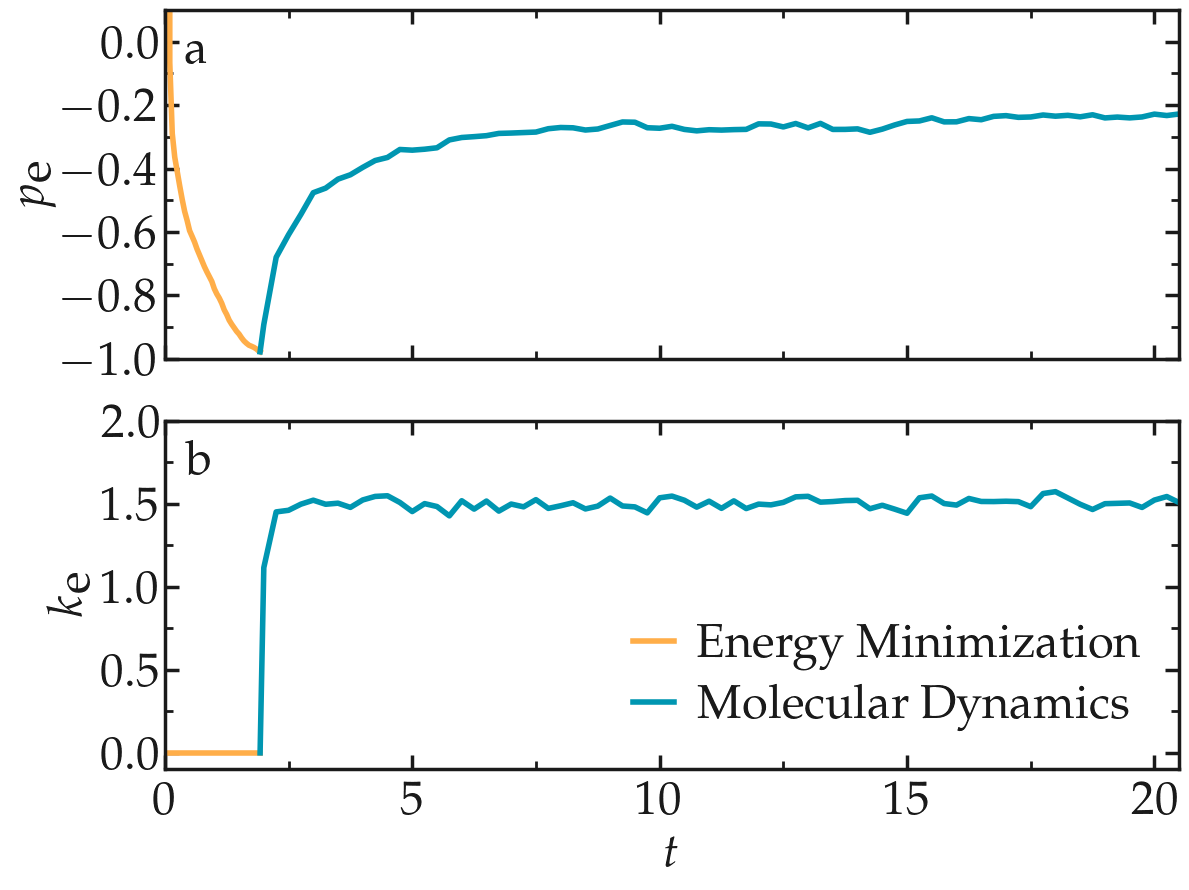

In [11]:
filename = "energy-article"
mode = 'light'
mygray = colors["mylightgray"]
fig = prepare_figure(mode, transparency = False, desired_figsize=(12,9))
ax, n, l_tot, c_tot = [], 0, 2, 1
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(Time_EM, PotEng_EM, '-', color=colors["myorange"],
            markersize = 12, linewidth=4)
ax[-1].plot(Time_MD, PotEng_MD, '-', color=colors["myblue"],
            markersize = 12, linewidth=4)
complete_panel(ax[-1], None, r'$p_\textrm{e}$', legend=False, axis_color=mygray)
set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20.5),
                y_ticks=np.arange(-1, 0.2, 0.2), y_boundaries=(-1, 0.1))
n += 1
ax.append(plt.subplot(l_tot, c_tot, n))
ax[-1].plot(Time_EM, KinEng_EM, '-', color=colors["myorange"],
            markersize = 12, linewidth=4, label=r"Energy Minimization")
ax[-1].plot(Time_MD, KinEng_MD, '-', color=colors["myblue"],
            markersize = 12, linewidth=4, label=r"Molecular Dynamics")
complete_panel(ax[-1], r'$t$', r'$k_\textrm{e}$', legend=True, axis_color=mygray, xpad=8)
set_boundaries(plt, x_ticks=np.arange(0, 25, 5), x_boundaries=(0, 20.5),
                y_ticks=np.arange(-0, 2.5, 0.5), y_boundaries=(-0.1, 2))
add_subplotlabels(fig, ax, [r"$\mathrm{a}$", r"$\mathrm{b}$"], color=mygray)
save_figure(plt, fig, mode, git_path, path_figures, filename)